***
# Question 1 - Ploting and Charting (20 Points)

For this question, your task is to create a chart that visualizes a topic of interest related to finance, economics, business, banking, personal finance, currency, etc. 

Requirement:
1. You have the flexibility to choose any relevant topic, but you cannot reuse or reformat prior homework or in-class examples, such as historical stock price trends.
2. Produce a chart using Python and a suitable data visualization library like Matplotlib or Seaborn (there are many others). Your chart should include ___at least two data sources and last least two variables___ and effectively present insights related to your chosen topic. Please clearly label X, Y, and title the graph.
3. Provide a detailed paragraph discussing the data and sources you utilized. Explain any variable construction or transformation you performed, if applicable. Additionally, offer a brief commentary on the trend or pattern presented in your graph.
4. Make sure that your code allows for easy replication of your graph by providing all necessary code and instructions, without relying on local data. (I do not additional files to reproduce your graph)
5. pandas-datareader will be helpful but you are more than welcome to go beyond (https://pandas-datareader.readthedocs.io/en/latest/readers/index.html) 

In [ ]:
#run necessary installs.
!pip install pandas_datareader yfinance numpy_financial

In [2]:
#import all necessary libraries

import pandas_datareader.data as web
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import statsmodels.formula.api as smf
import numpy_financial as npf

In [3]:
# Set the date range for the data - to be used for a range of 10Y history.
start_date = dt(2014, 1, 1)
end_date = dt(2024, 12, 15)

# Fetch data from FRED, yahoo finance
savings_rate = web.get_data_fred("PSAVERT", start = start_date, end = end_date) #fred data for savings rate (%)
volatility = yf.download("^VIX", start=start_date, end= end_date) # volatility index (fear and greed indicator, market certainty)
volatility = volatility["Adj Close"] #only keep closing figure, arbitrarily chosen over open.
volatility = volatility[volatility.index.day ==1] #filter so data is monthly, as the fred data was

data = volatility.join(savings_rate) #join data
data = data.dropna(axis = 0) #had one NA value, dropped it
data.columns = ["volatility", "Savings rate"] #rename columns

[*********************100%***********************]  1 of 1 completed


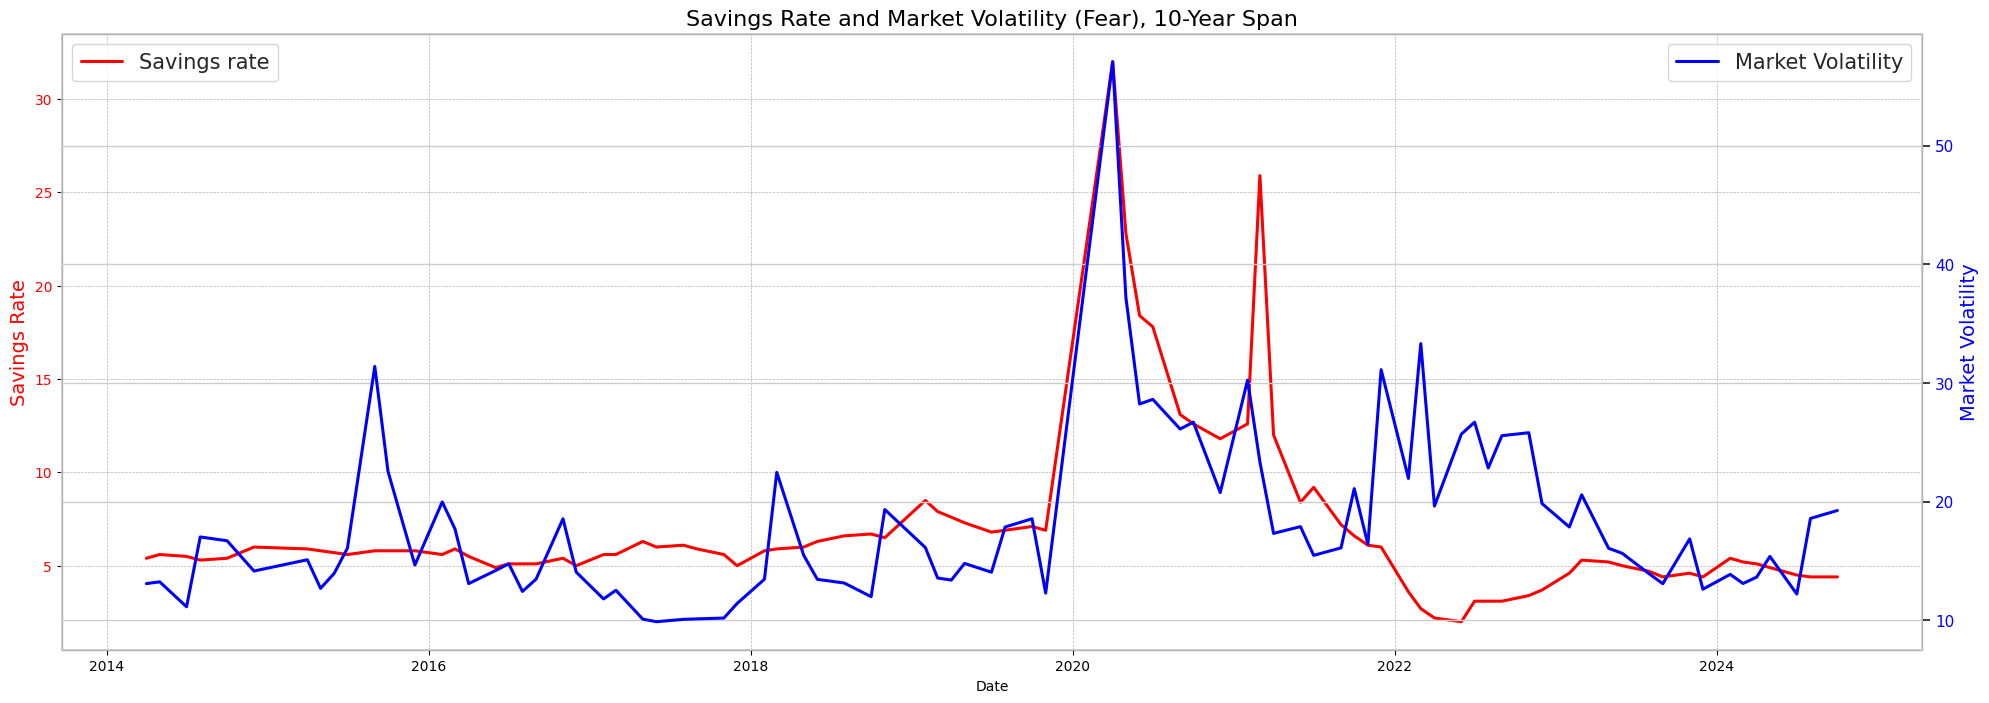

In [4]:
warnings.filterwarnings("ignore",module = "seaborn")  # a large warning appeared that was not applicable to my data or plot

# Set up the figure for use with two data points over time
fig, ax1 = plt.subplots(figsize=(24, 8))
sns.set_theme(style="whitegrid", palette="muted")

# Title and grid
plt.title("Savings Rate and Market Volatility (Fear), 10-Year Span", fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Primary y-axis: Consumer Debt
sns.lineplot(x=data.index, y=data["Savings rate"], ax=ax1, linewidth=2.2, color='red', label="Savings rate")
ax1.set_ylabel("Savings Rate", fontsize=14, color="red")
ax1.tick_params(axis='y', labelcolor="red")

# Secondary y-axis: Savings Rate
ax2 = ax1.twinx()
sns.lineplot(x=data.index, y=data["volatility"], ax=ax2, linewidth=2.2, color='blue', label="Market Volatility")
ax2.set_ylabel("Market Volatility", fontsize=14, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Legends
ax1.legend(loc="upper left", fontsize=15)
ax2.legend(loc="upper right", fontsize=15)

plt.show()


# Explanation of Data ingestion and visualization:

The analysis utilizes two datasets over a 10-year period (2014–2024): the U.S. personal savings rate, sourced from FRED (Federal Reserve Economic Data), and market volatility, represented by the VIX index, obtained from Yahoo Finance. The savings rate, expressed as a percentage of disposable personal income, measures household financial prudence, while the VIX serves as a proxy for market fear and uncertainty. To harmonize the data frequencies, the VIX data—initially daily—was filtered to include only the first day of each month, aligning with the monthly savings rate data. Both datasets were then merged, with missing values dropped to ensure integrity in the analysis. The plotted graph reveals a contrasting relationship: periods of heightened market volatility (blue line) often coincide with elevated savings rates (red line), reflecting a potential shift toward risk-averse behavior during uncertain market conditions. This inverse relationship suggests that economic turmoil may prompt precautionary savings, underscoring the interplay between financial markets and consumer sentiment.


# Question 2 - Data Analysis: Industrial Automation Distribution (30 Points)

This exercise builds upon our recent in-class discussion and demo. If you attended the session, you should be familiar with the context and background for this question.

With the rise of emerging technologies, we aim to explore the pattern of annual industrial-level adoption of industrial robotics in the U.S. economy. The extent of automation is proxied by the variable, 'operational stock', in the provided raw dataset (`dataset.csv`) on CANVAS, which measures the number of robots currently deployed in each industry each year. Our analysis will focus on the period from 2004 to 2020. Additionally, we aim to investigate the potential link between capital market volatility and the adoption of industrial robotics, using the CBOE Implied Volatility Index as a measure of market uncertainty.

### Instructions

1. (1 point) Print the Current Working Directory

2. (4 points) Prepare the Dataset from raw data
- Create a DataFrame of annual industry-level robotics distribution based on the operational stock of robotics.
- The industry classification is represented by the `industry` column, which is categorical. Exclude the category **'all industries'** from the analysis.
- Restrict the data to the given sample period


3. (5 points) Industry-Level Trends
- Select **at least three specific industries** of your choice and create visualizations to compare their trends in industrial robotics adoption.
- Provide a brief explanation for your industry selections and interpret the observed trends (at least 100 words).



4. (5 points) Aggregate and Visualize Annual Robotics Stock
- Calculate the annual mean of robotic stock across all industries (excluding 'all industries').
- Produce a time series plot to display the trends of the total stock of robotics in U.S. economy over the given sample period, clearly label your plot.



5. (5 points) Incorporate Market Volatility Data
- Web-extract the data for the CBOE Implied Volatility Index.
- Aggregate the volatility data to a reasonable frequency level and merge it with the robotics operational stock dataset.
- Provide detailed summary statistics of the merged sample.


6. (5 points) Regression Analysis
- Perform an Ordinary Least Squares (OLS) regression, using the implied volatility to explain the annual stock of robotics.
 - For your regression, you need to take the log transformation of both variables. 
- Clearly state the regression equation and interpret the coefficients and statistical significance.



7. (5 points) Interpretation 
- Based on our in-class discussion, how do you interpret the results of regression test? Provide a discussion on the economic intuition. Please provide a textual response (at least 200 words). Your response must relate to our in class discussion on this topic.
- Based on our in-class discussion, are there any limitations of your model and estimation?



## Notes
- You should NOT manually make any changes in the given csv file. Everything must be implemented in python.
- Ensure your analysis is well-documented and include comments in your code for clarity.
- Your visualizations should be clear, labeled appropriately, and support your interpretation.
- Your textual response for Step 7 should demonstrate critical thinking and directly reference concepts discussed during the lecture.
- In your submitted file, you should present your visualized outcomes (graphs). 


# #2.1 print cwd:

In [15]:
print(os.getcwd())

/kaggle/working


# #2.2- load in data and filter it

In [20]:
path = "/kaggle/input/fin-data/dataset.csv"
datacsv = pd.read_csv(path) #importing the data to pandas DF
datacsv = datacsv[datacsv["industry"] != "All Industries"] #filter out All Industries values
datacsv = datacsv[(datacsv["Year"] >= 2004) & (datacsv["Year"] <= 2020)] #filter the data to the correct date range
datacsv.head(3) #check data

,Year,industry,installations,industry_encoded,Three_Component_Index,News_Based_Policy_Uncert_Index,FedStateLocal_Ex_disagreement,CPI_disagreement,Tax_expiration,GEPU_current,...,oas_aaa,oas_euro,yield3m,yield6m,yield1y,l_oas_aaa,l_oas_euro,l_yield3m,l_yield6m,l_yield1y
40,2004,All other manufacturing branches,0.0,All other manufacturing branches,93.050836,90.600457,55.759980,94.410906,407.645599,77.020658,...,0.60,3.45,1.37,1.58,NaN,0.77,5.77,1.01,1.05,NaN
41,2005,All other manufacturing branches,328.0,All other manufacturing branches,71.750738,70.873511,44.408330,77.243741,223.606545,65.270842,...,0.58,3.39,3.15,3.39,NaN,0.60,3.45,1.37,1.58,NaN
42,2006,All other manufacturing branches,60.0,All other manufacturing branches,71.328693,67.136287,55.416367,85.723040,130.478442,62.675594,...,0.59,2.91,4.73,4.81,NaN,0.58,3.39,3.15,3.39,NaN


# #2.3: industry selection for data filtering and plotting:


<Axes: xlabel='Year', ylabel='robotics count (operational_stock)'>

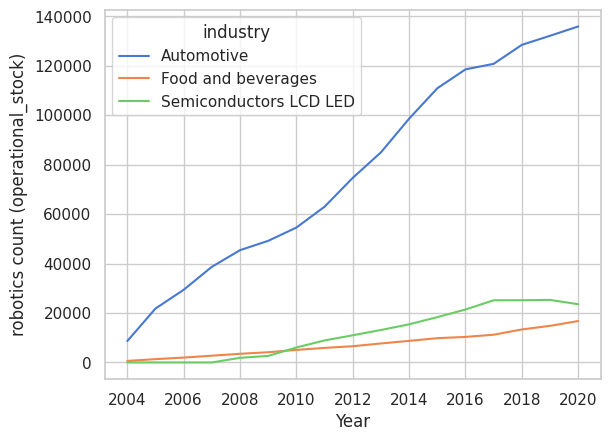

In [17]:
ind = ["Automotive","Semiconductors LCD LED", "Food and beverages"] #my choice of instustries
filtered = datacsv[datacsv["industry" ].isin(ind)] #new filtered dataset containing only my desired 3 insdustries
filtered.reset_index(inplace = True) #indexes were out of order after row filtering
plt.ylabel("robotics count (operational_stock)")
sns.lineplot(data = filtered, x = "Year", y = "operational_stock", hue = "industry") #plot data, color each line by its industry

# #2.3 Industry selection choice and interpretation:
I selected Automotive due to the widespread prevalence in robotic assembly of cars in factories. i chose food and beverages out of curiosity because robotics can only really be used in food packaging but not as much in actual distribution and serving, and i was curious as to whether robots were being used much in semiconductor production because it is still a very human labor demanding field. Not surprisingly, automotive industry robotic adoption has grown massively to account for the increasing scale and demand of car production, and interestingly food and beverage robotic growth is comparable to semiconductors, with semconductor robot growth actually stalling post 2017. maybe the industry hit its robot usefulness limit, or the industry has not been expanding much due to its high barrier to entry.

# #2.4 Per indsutry mean robotics over time, code and plot

Text(0, 0.5, 'Avg. Robot Count')

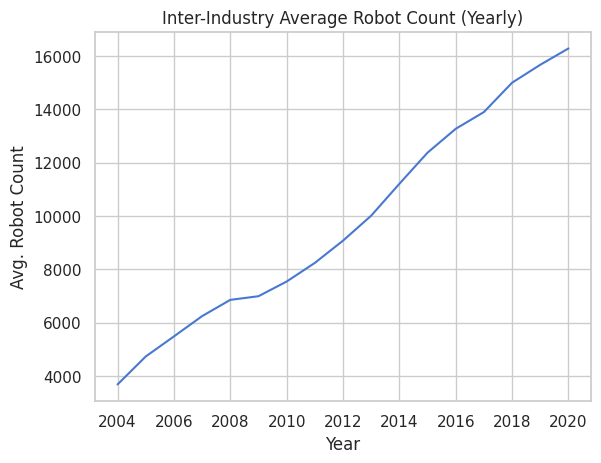

In [21]:
yearlyRobotics = datacsv.groupby("Year")["operational_stock"].mean() #group by year and take mean of each subgroup's operational stock
sns.lineplot(data=yearlyRobotics,x = "Year", y= yearlyRobotics.values) #plot  this data over the year range
#plot labelling
plt.title("Inter-Industry Average Robot Count (Yearly)")
plt.ylabel("Avg. Robot Count")

# #2.5 - market volatility ingestion and merge with previous data:

In [22]:
vol = yf.download("^VIX", start="2004-01-01", end= "2021-01-01") # get volatility index over 2004 - 2020 range
vol.head() #check data is good

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX,^VIX
Date,,,,,,
2004-01-02,18.219999,18.219999,18.68,17.540001,17.959999,0
2004-01-05,17.490000,17.490000,18.49,17.440001,18.450001,0
2004-01-06,16.730000,16.730000,17.67,16.190001,17.660000,0
2004-01-07,15.500000,15.500000,16.75,15.500000,16.719999,0
2004-01-08,15.610000,15.610000,15.68,15.320000,15.420000,0


In [23]:
vol["year"] = vol.index.year #in order to group volatility mean yearly next
volatilityYearly = vol.groupby("year")["Close"].mean().values #group by year and aggregrate mean for each year
merged = pd.DataFrame({"robotics": yearlyRobotics.values.tolist(), "volatility": np.ravel(volatilityYearly).tolist()}, index = yearlyRobotics.index) #merge robotics & IVX
#print Yearly summary statistics
print("correlation (r): ",merged.corr().loc["robotics", "volatility"])# r correlation coefficient between the two variables
merged.describe()

correlation (r):  -0.06923748921785404


,robotics,volatility
count,17.000000,17.000000
mean,9800.160991,18.860282
std,4030.381030,6.722234
min,3686.710526,11.090239
25%,6857.605263,14.230119
50%,9077.447368,16.639841
75%,13271.526316,22.548889
max,16284.052632,32.692609


# #2.6- ols model fitting and summary stats:

In [24]:
model = smf.ols("np.log(robotics)~ np.log(volatility)", data = merged).fit() # fit an ols model regrssing log of robotics on log of volatility
print(model.summary()) #check summary stats

                            OLS Regression Results                            
Dep. Variable:       np.log(robotics)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                  0.004381
Date:                Sun, 15 Dec 2024   Prob (F-statistic):              0.948
Time:                        21:07:17   Log-Likelihood:                -9.8824
No. Observations:                  17   AIC:                             23.76
Df Residuals:                      15   BIC:                             25.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.1697      1

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


# #2.6 - Regression equation & coefficients:
## Equation :
log(robotics) = 9.1697 - 0.0234(log(volatility))
## Coef. Explanation:
For every unit increase in log volatility, log robotics decreases by .0234. As for statistical significance, the standard error of the independent variable 
(log of robotics) is .354, and its pvalue is 0.948, meaning it has nearly no signficance whatsoever. looking at our 95% confidence interval for where the true value of the coefficient lies, it is very clear that this is not a good predictor for log(mean yearly robotic count).

# #2.7 - Model interpretation:
The regression results for the model indicate no significant relationship between the log-transformations of volatility and robotics. The coefficient for np.log(volatility) is -0.0234, suggesting that a 1% increase in volatility is associated with a small 0.0234% decrease in robotics. However, the effect is statistically insignificant, as evidenced by a p-value of 0.948 and a t-statistic of -0.066. The R-squared value of 0.000 further highlights the model's inability to explain any variance in np.log(robotics), with an adjusted R-squared of -0.066 underscoring the poor model fit. From an economic perspective, while the negative coefficient might suggest that increased uncertainty or risk (proxied by volatility) could reduce activity in robotics, this interpretation lacks empirical support given the absence of statistical significance. The results suggest that volatility is not a meaningful predictor of robotics, at least in the context of this dataset. Several limitations in the model may contribute to these results. The inclusion of only one predictor ignores other critical factors, such as technological advancements, economic conditions, or industry trends, which likely have a stronger influence on robotics. Additionally, the small sample size (17 observations) reduces the power of the analysis and may fail to capture meaningful relationships. The use of a log-linear specification assumes a multiplicative relationship, which may not reflect the true dynamics. Finally, the nonrobust covariance type suggests potential issues with heteroskedasticity or non-normality. Overall, the results demonstrate the need for a more comprehensive model to better understand the drivers of robotics.

***
# Question 3 (25 Points) - Capital Budgeting

- Context: Your company is considering a new capital investment of a large equipment. The future project cash flows associatated with this investment is `[5300, 5400, 5895, 6000, 7008, 7532, 8000, 8032, 8521, 8600, 9023]` (starting from $t_1$). The risk-adjusted discount rates for each invetment period are estimated as `[0.101, 0.092, 0.112, 0.113, 0.130, 0.145, 0.145, 0.149, 0.113, 0.151, 0.156] `(starting from $t_1$).
    - Determine the number of investment periods `T`.
    - (10 points) What is the net present value (NPV) of this project? Given the initial equipment purchasing price to be $\$15038$ (at $t_0$) and the initial consulting fee of $\$5355$ (at $t_0$).
    - (5 points) Given the above project cashflow structure, what is the internal rate of return (IRR)?
    - (4 points)  If the discount rates vector uniformly decreases by  -0.0056, what is the new NPV generated by this investment? What is the percentage change (sensitivity) in NPV ($\% \dfrac{\Delta NPV}{NPV}$) associated with this discount rates change? 
    - (6 points)  Discuss if your project CF is further assumed to be growing over time, the growth rate $g$ is subject to a normal distribution $N(\mu=0.0035, \sigma=0.04)$, the first stream of project cash flow ($CF_{t_1}$) is $\$5300$, ___describe___ in detail how to model your project PCF (___We discussed this topic in class. To get the points of this question, you are expected to exapand your answer around our in-class discussion.___)

In [13]:
#copying the data into np array format
fpcf = np.array([5300, 5400, 5895, 6000, 7008, 7532, 8000, 8032, 8521, 8600, 9023])
radr = np.array([0.101, 0.092, 0.112, 0.113, 0.130, 0.145, 0.145, 0.149, 0.113, 0.151, 0.156])
initial_equipment = 15038
initial_consulting = 5355

# Calculate cumulative discount factor:
# For year i, the total discount factor is the product of (1 + r_j) for j=1 to i
discount_factors = np.cumprod(1 + radr)

# Discount each cash flow by the respective cumulative factor
discounted_flows = fpcf / discount_factors

pv_of_flows = discounted_flows.sum()

# NPV = PV of future cash flows - initial outlay
npv = pv_of_flows - (initial_equipment + initial_consulting)
print("number of investment periods: ", len(radr))
print("NPV of the project is:", npv)

# Cash flows: negative at t=0, followed by positive flows at t=1...t=11
cash_flows = np.array([-20393, 5300, 5400, 5895, 6000, 7008, 7532, 8000, 8032, 8521, 8600, 9023])
irr = npf.irr(cash_flows)

print("IRR:", irr)

initial_outlay = 15038 + 5355
original_discount_factors = np.cumprod(1 + radr)

# Original NPV calculation
original_pv = (fpcf / original_discount_factors).sum()
original_npv = original_pv - initial_outlay

# Adjust discount rates
delta = -0.0056
radr_new = radr + delta
new_discount_factors = np.cumprod(1 + radr_new)

# New NPV calculation
new_pv = (fpcf / new_discount_factors).sum()
new_npv = new_pv - initial_outlay

# Percentage change
percentage_change = ((new_npv - original_npv) / original_npv) * 100


print("New NPV after decreasing discount rates:", new_npv)
print("Percentage change in NPV:", percentage_change, "%")
print(" ")
print("The CF are assumed more likely to be growing given the growth rate mean is above 0, but because the SD is .04, it may not. To model project cash flows (PCF) with a normally distributed, uncertain growth rate, you start with the known initial cash flow and apply \
year-over-year multiplicative growth factors drawn from the specified distribution. By running a Monte Carlo simulation, you generate a wide range\
of possible future trajectories, reflecting the inherent uncertainty in the growth rate. This approach, discussed in class, allows you to move from a \
single deterministic forecast to a probabilistic understanding of your project’s future cash flows.")

number of investment periods:  11
NPV of the project is: 20312.191402257085
IRR: 0.28918636008839815
New NPV after decreasing discount rates: 21429.929033200693
Percentage change in NPV: 5.502791938143144 %
 
The CF are assumed more likely to be growing given the growth rate mean is above 0, but because the SD is .04, it may not. To model project cash flows (PCF) with a normally distributed, uncertain growth rate, you start with the known initial cash flow and apply year-over-year multiplicative growth factors drawn from the specified distribution. By running a Monte Carlo simulation, you generate a wide rangeof possible future trajectories, reflecting the inherent uncertainty in the growth rate. This approach, discussed in class, allows you to move from a single deterministic forecast to a probabilistic understanding of your project’s future cash flows.


# Question 4 (25 points)  Numpy Array Computation in Business Operation

- Your business has 3 stores across 3 different regions. Below is the data of your number of customer visits of each month each store over the past year (from Jan to Dec 2021). For example, in the first list given `[1169, 1245, 1400, 1305, 2002, 3020, 4540, 3987, 4900, 5010, 6939, 8989]`, 1169 represents that there are totally 1169 customer visits for store 1 in January, 1245 means there are 1245 customer visits of store 1 in Feb, etc.

Now, you want to get an idea of the customer flow distribution across 3 different stores you have -

1. (12 points) ***For each store, each month***, what is the percentage of the customer flow for that given year? calculate the percentage series of customer flow of each store (you should get an array for each store)

    - hint: First, you need to aggregate the annual total customer visitis of each store. Second, compute the ratio of $\dfrac{number\ of\ customer\ visits_{month\ i, store\ j}}{annual\ customer\ visit_{store\ j} }$ for each store. Your results should be in the form of 3 arrays. For example, for the first element of store 1, you need to get $\dfrac{1169}{1169 + 1245 + ... + 8989 }= 2.6266\%$, and so on.
    
2. (12 points) For each store, calculate the percentage of the annual total customer visitis over the annual total customer visits of the entire business

    - hint: First, calculate the summation of the the number of the visits of the entire business - sum of the annual total visits of all 3 stores. Second, take the ratio of $\dfrac{\Sigma\ number\ of\ customer\ visits_{month\ i, store\ j}}{Annual\ total\ customer\ visists\ of\ whole\ business}$.
    
3. (1 point) use print function to show your results.

 ~ store1: `[1169, 1245, 1400, 1305, 2002, 3020, 4540, 3987, 4900, 5010, 6939, 8989]`

 ~ store2: `[780,  804, 930, 1305, 1504, 2829, 3542, 4001, 3764, 4703, 6523, 8010]`

 ~ store3: `[1552, 1621, 1830, 1902, 2098, 3923, 5563, 5017, 6102, 6880, 7069, 9140]`

 
***Note that your computation should be implemented using Numpy array***


In [25]:
#copy in data
store1 = np.array([1169, 1245, 1400, 1305, 2002, 3020, 4540, 3987, 4900, 5010, 6939, 8989])

store2 = np.array([780,  804, 930, 1305, 1504, 2829, 3542, 4001, 3764, 4703, 6523, 8010])

store3 = np.array([1552, 1621, 1830, 1902, 2098, 3923, 5563, 5017, 6102, 6880, 7069, 9140])

# Calculate annual totals
total_store1 = np.sum(store1)
total_store2 = np.sum(store2)
total_store3 = np.sum(store3)

# Calculate monthly percentages
monthly_store1 = store1 / total_store1 * 100
monthly_store2 = store2 / total_store2 * 100
monthly_store3 = store3 / total_store3 * 100



# Total visits of the entire business
total_business = total_store1 + total_store2 + total_store3

# Percentage of each store's visits relative to the total business visits
percentage_store1 = (total_store1 / total_business) * 100
percentage_store2 = (total_store2 / total_business) * 100
percentage_store3 = (total_store3 / total_business) * 100
#print all variables I used:
variables = {
    "sales percentage by monthfor store 1": monthly_store1,
    "sales percentage by monthfor store 2": monthly_store2,
    "sales percentage by monthfor store 3": monthly_store3,
    "total sales of business": total_business,
    "percentage of business store1": percentage_store1,
    "percentage of business store2": percentage_store2,
    "percentage of business store3": percentage_store3
}
variables

{'sales percentage by monthfor store 1': array([ 2.62661214,  2.79737563,  3.14564328,  2.93218892,  4.4982699 ,
         6.78560194, 10.20087179,  8.9583427 , 11.00975149, 11.25690918,
        15.59115625, 20.19727677]),
 'sales percentage by monthfor store 2': array([ 2.01576431,  2.07778783,  2.40341129,  3.37252875,  3.88680708,
         7.3110221 ,  9.15363742, 10.33983719,  9.72735496, 12.15402507,
        16.85747513, 20.70034888]),
 'sales percentage by monthfor store 3': array([ 2.94513919,  3.07607644,  3.47268345,  3.60931362,  3.9812513 ,
         7.44444655, 10.55657817,  9.52046606, 11.5794068 , 13.05577168,
        13.41442587, 17.34444086]),
 'total sales of business': 135898,
 'percentage of business store1': 32.749562171628725,
 'percentage of business store2': 28.4735610531428,
 'percentage of business store3': 38.77687677522848}

---